# 데이터 전처리

In [1]:
# import os
# import unicodedata
# from PIL import Image

# # 이미지 경로 설정
# dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
# fake_dir = os.path.join(dataset_dir, "fake")

# # 파일명 정리 + 변환 함수
# def clean_and_convert_images(directory):
#     for filename in os.listdir(directory):
#         # 유니코드 정규화 (한글 깨짐 방지)
#         normalized_filename = unicodedata.normalize("NFC", filename)
#         new_filename = normalized_filename  # 기본 파일명 설정

#         # "의 사본" 삭제
#         if "의 사본" in new_filename:
#             new_filename = new_filename.replace("의 사본", "").strip()

#         # 중복 확장자 제거 (예: .webp.webp → .webp)
#         root, ext = os.path.splitext(new_filename)
#         if root.endswith(ext):
#             new_filename = root

#         old_path = os.path.join(directory, filename)
#         new_path = os.path.join(directory, new_filename)

#         # 파일명이 변경되었을 경우만 수정
#         if filename != new_filename:
#             os.rename(old_path, new_path)
#             print(f"Renamed: {filename} -> {new_filename}")
#             old_path = new_path  # 변경된 파일명을 기반으로 다시 설정

#         # 확장자가 .webp인 경우 .png로 변환
#         if new_filename.endswith(".webp"):
#             png_filename = new_filename.replace(".webp", ".png")
#             png_path = os.path.join(directory, png_filename)

#             with Image.open(old_path) as img:
#                 img.save(png_path, "PNG")  # PNG로 저장

#             os.remove(old_path)  # 원본 .webp 파일 삭제
#             print(f"Converted: {new_filename} -> {png_filename}")

# # fake 디렉토리에서만 실행
# clean_and_convert_images(fake_dir)

# print("📂 fake 디렉토리 파일 정리 및 변환 완료! ✅")


# GPU 할당

In [1]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


2025-03-13 20:12:47.162408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 20:12:47.178028: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 20:12:47.182746: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 20:12:47.197999: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 20:12:48.004592: W tensorflow/compiler/tf2

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-03-13 20:12:49.484558: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 17169 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


# 필요한 라이브러리 로드

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [ ]:
## 모델 로드
# model_path = "/home/jangminoh_2/AI_Detector/model/model_v3.h5"
# model = load_model(model_path)

In [3]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("/home/jangminoh_2/AI_Detector/3/my_model.keras")

# DALLE

In [4]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/real"

Found 60 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741864404.616357  567943 service.cc:146] XLA service 0x72eddc0ba010 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741864404.616433  567943 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-03-13 20:13:24.854978: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-13 20:13:25.922450: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
202

 5/60 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step 

I0000 00:00:1741864415.114658  567943 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


60/60 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step
[[1.0189080e-01]
 [5.4582603e-02]
 [5.4023112e-03]
 [1.4653587e-01]
 [1.8865551e-01]
 [6.1463460e-02]
 [3.2030800e-01]
 [1.7594743e-01]
 [3.0726624e-01]
 [4.4230378e-01]
 [2.7204353e-02]
 [8.0752268e-02]
 [5.1587060e-02]
 [3.3597615e-01]
 [1.6732933e-03]
 [2.5326020e-01]
 [2.2142924e-01]
 [1.4656289e-01]
 [4.1506162e-01]
 [6.0581481e-01]
 [7.1546471e-01]
 [8.7074272e-04]
 [1.8766600e-01]
 [1.7681811e-02]
 [1.0522055e-01]
 [5.7993587e-02]
 [5.3372569e-02]
 [3.8212547e-01]
 [5.8555700e-02]
 [1.1324123e-01]
 [1.7961907e-01]
 [1.0925551e-01]
 [6.8929931e-03]
 [4.6853656e-01]
 [3.6052826e-01]
 [2.4710007e-03]
 [7.4274063e-02]
 [4.9540116e-03]
 [2.5952581e-01]
 [4.4564918e-02]
 [5.7960100e-02]
 [5.2855778e-02]
 [6.2539870e-01]
 [4.8479150e-04]
 [4.3678343e-02]
 [7.9821446e-04]
 [8.2376674e-03]
 [1.2853561e-02]
 [2.1026189e-02]
 [1.3526208e-03]
 [1.5795514e-02]
 [1.8637750e-02]
 [1.5250463e-03]
 [5.6195998e-01]
 [4.6030771e-02]
 [9.4966398e-04]
 [2.630

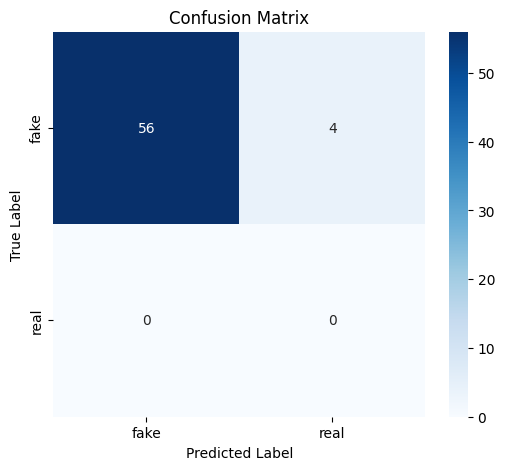


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.93      0.97        60
        real       0.00      0.00      0.00         0

    accuracy                           0.93        60
   macro avg       0.50      0.47      0.48        60
weighted avg       1.00      0.93      0.97        60



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [5]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Flamel

In [6]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/real"

In [7]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 128, Real: 0


Found 128 images belonging to 2 classes.


  4/128 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
[[1.40533715e-01]
 [8.38670611e-01]
 [1.98031992e-01]
 [4.26445335e-01]
 [8.68995667e-01]
 [2.66619861e-01]
 [1.49250299e-01]
 [9.02680695e-01]
 [8.08272541e-01]
 [9.67645049e-01]
 [3.69285852e-01]
 [2.10070480e-02]
 [6.50798738e-01]
 [1.14384301e-01]
 [4.19527233e-01]
 [3.07675779e-01]
 [4.17091519e-01]
 [2.53598634e-02]
 [1.05561845e-01]
 [4.74953130e-02]
 [4.07626256e-02]
 [7.40285695e-01]
 [2.06447206e-02]
 [5.26808858e-01]
 [3.16143073e-02]
 [2.88817734e-01]
 [4.41903472e-02]
 [4.99642402e-01]
 [6.07559159e-02]
 [5.32061458e-02]
 [6.46383166e-01]
 [1.03335299e-01]
 [1.13558963e-01]
 [8.72240603e-01]
 [3.96220624e-01]
 [3.83641690e-01]
 [4.89787489e-01]
 [3.36776763e-01]
 [1.50989637e-01]
 [7.14648366e-01]
 [1.79026827e-01]
 [1.30292922e-02]
 [8.33612904e-02]
 [7.08909094e-01]
 [8.52264464e-04]
 [5.25118947e-01]
 [5.45238733e-01]
 [5.62815785e-01]
 [2.62613520e-02]
 [2.89793015e-01]
 [9.35115397e-01]
 [9.92624611e-02]
 [1.29372373e-01]
 [2.

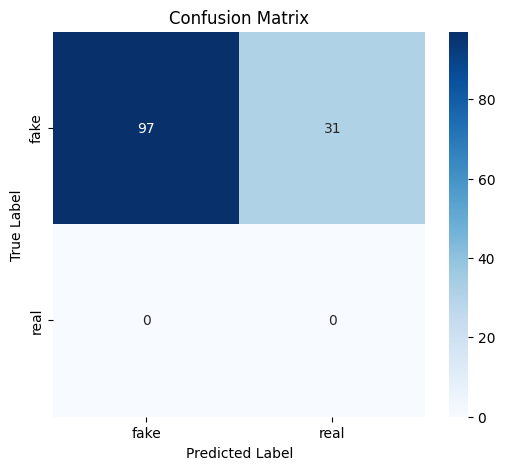


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.76      0.86       128
        real       0.00      0.00      0.00         0

    accuracy                           0.76       128
   macro avg       0.50      0.38      0.43       128
weighted avg       1.00      0.76      0.86       128



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [8]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Midjourney

In [9]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/real"

In [10]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 132, Real: 0


Found 132 images belonging to 2 classes.


  4/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step
[[1.24321878e-02]
 [2.28182003e-02]
 [2.11575985e-01]
 [8.01323593e-01]
 [1.60822086e-02]
 [6.39229789e-02]
 [1.21933809e-02]
 [2.92788278e-02]
 [2.31214929e-02]
 [6.79423138e-02]
 [1.26886619e-02]
 [6.41460344e-02]
 [6.16534725e-02]
 [1.85475200e-01]
 [1.41273171e-01]
 [1.53758764e-01]
 [6.32981434e-02]
 [1.48554012e-01]
 [4.03277650e-02]
 [1.93590507e-01]
 [9.25241187e-02]
 [1.77394241e-01]
 [2.29983404e-02]
 [4.11027856e-02]
 [5.57385087e-01]
 [1.79452404e-01]
 [2.43055210e-01]
 [9.91085321e-02]
 [2.12516636e-01]
 [9.86389101e-01]
 [9.43857253e-01]
 [3.95270772e-02]
 [9.19335987e-03]
 [5.85337542e-02]
 [3.95270772e-02]
 [6.42713681e-02]
 [2.29680672e-01]
 [1.97528489e-02]
 [2.51826271e-02]
 [9.05890111e-03]
 [1.29664056e-02]
 [2.19177935e-04]
 [2.06572688e-04]
 [4.36812785e-04]
 [1.04438564e-04]
 [3.13483328e-02]
 [2.86698751e-02]
 [1.11155383e-01]
 [7.74535611e-02]
 [2.36123390e-02]
 [2.27428395e-02]
 [2.72079222e-02]
 [1.54439649e-02]
 [2.

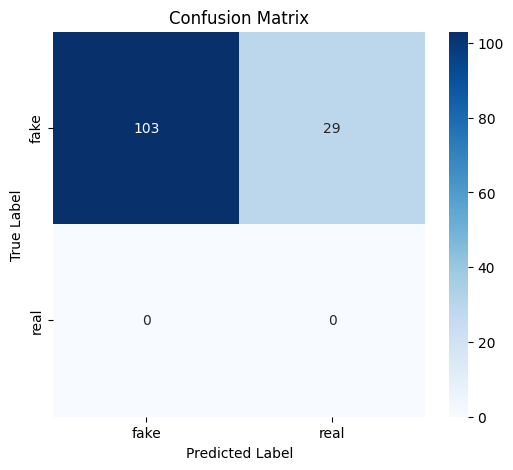


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.78      0.88       132
        real       0.00      0.00      0.00         0

    accuracy                           0.78       132
   macro avg       0.50      0.39      0.44       132
weighted avg       1.00      0.78      0.88       132



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [11]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# StableDiffusion

In [13]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/real"

In [14]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 20, Real: 0


Found 20 images belonging to 2 classes.


 4/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0.41128328]
 [0.69850236]
 [0.7947292 ]
 [0.7400126 ]
 [0.83090013]
 [0.8087094 ]
 [0.968592  ]
 [0.6569415 ]
 [0.8679257 ]
 [0.9733261 ]
 [0.06379167]
 [0.29627466]
 [0.18213528]
 [0.3928773 ]
 [0.43317136]
 [0.23917225]
 [0.02388703]
 [0.05789607]
 [0.54125184]
 [0.00830472]]
Model Accuracy: 0.5000


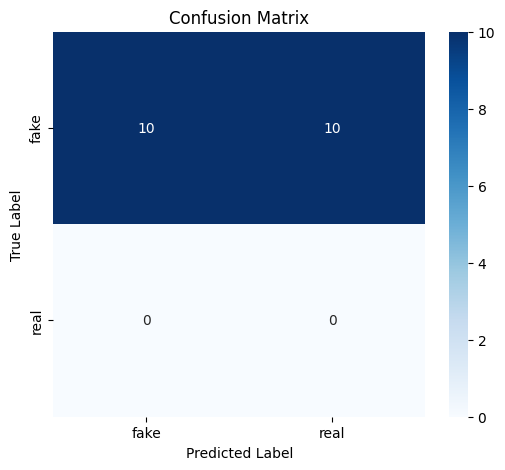


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.50      0.67        20
        real       0.00      0.00      0.00         0

    accuracy                           0.50        20
   macro avg       0.50      0.25      0.33        20
weighted avg       1.00      0.50      0.67        20



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [15]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
